***Yapay Sinir Ağları FİNAL SINAV PROJESİ ***

*YSA Kullanarak Kırmızı Şarap Kalite Veri Görselleştirmesi*

**İsim Soyisim:** İlyas Sancar İzzetgil

**Öğrenci No:** 194418801

**Bölüm:** Elektrik Elektronik Mühendisliği

**Sınıf:** 4.sınıf

**Tarih:** 13.01.2023

Winequality-red.csv veri seti, kırmızı şarap özelliklerini içeren bir veri setidir. Bu veri setinde, örneğin pH, asitlik, alkol oranı, güç gibi özellikleri içeren çeşitli özellikler için veriler bulunur. Ayrıca, şarap kalitesi için bir sınıflandırma değeri de mevcuttur. Bu veri seti genellikle makine öğrenimi modelleri için eğitim ve test amaçlı kullanılır.

Winequality-red.csv veri seti, 12 özellik ve 1 sınıflandırma değeri içermektedir. Özellikler şunlardır:

fixed acidity: sabit asitlik

volatile acidity: hava şartlarına bağlı olarak değişebilen asitlik

citric acid: sitrik asit

residual sugar: kalan şeker

chlorides: klorür

free sulfur dioxide: serbest sulfur dioksit

total sulfur dioxide: toplam sulfur dioksit

density: yoğunluk

pH: pH değeri

sulphates: sulfat

alcohol: alkol oranı

quality: kalite (1-10 arasında değer alabilir)

Kaggle üzerinden, "winequality-red.csv" isimli Yapay Sinir Ağları ile uyumlu olan veri seti, csv formatıyla indirilmiştir. Bu veri setinin seçilmesinin sebebi Kırmızı şarap kalitesi konusunda tamamen nitelikli sayısal veriler içeriyor olmasıdır.

İleriki işlemlerde kullanılacak olan Numpy, Pandas, Matplotlib, Seaborn kütüphaneleri tanımladık.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Proje klasöründeki .csv uzantılı veri seti okunur

In [4]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [5]:
df = pd.read_csv("winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [7]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Null değerinin olup olmadığı kontrol edilir

In [9]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [10]:
df.notna().any()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

In [11]:
df.isna().all()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [12]:
df.notna().all()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

In [13]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
#Sadece 1 tane sınıfımız var. Görselleştirirken 1 tane daha sınıfımız olsa iyi olabilir.
#Overweight adında yeni bir sınıf ekleyelim.
#Vücut kitle indeksi 25'den büyük ise 1 değil ise 0 olsun.

df["Yield"] = [1 if x > 9.6 else 0 for x in df.alcohol]
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Yield  
0      9.4        5      0  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      0

Grafiklerimizdeki font boyutu belirlenir

In [15]:
plt.rcParams.update({'font.size': 25})
#grafiklerdeki yazı boyutunu 25 piksel olarak ayarlamak için kullanıldı

In [16]:
sns.set_context("paper")

Renk paleti, ölçek barı, eksen isimleri, plot ismi ayarlanır.

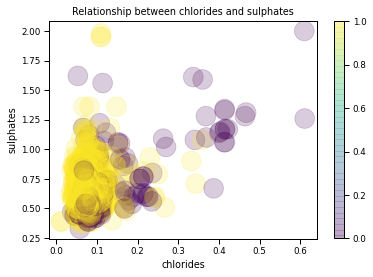

In [17]:
plt.scatter(df.chlorides, df.sulphates, c=df.Yield, s=389,
            alpha=0.2, cmap="viridis") #cmap renk paleti
plt.colorbar(); #hangi rengin hangi değere denk geldiğini gösteren yandaki ölçek
plt.xlabel("chlorides") #eksen ismi
plt.ylabel("sulphates") 
plt.title("Relationship between chlorides and sulphates") #plot ismi
plt.show()



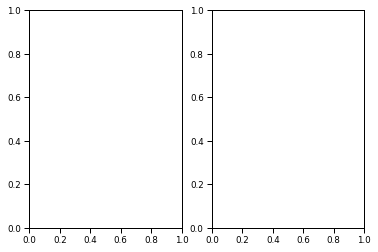

In [18]:
fig, ax = plt.subplots(1,2) #1 satir, 2 sütundan oluşan plot
plt.show()

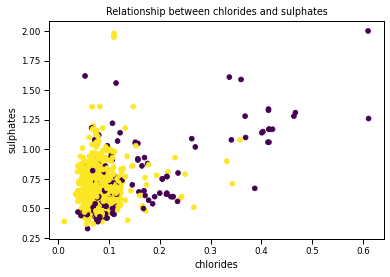

In [19]:
fig, ax = plt.subplots()
ax.scatter(df.chlorides, df.sulphates, c=df.Yield, cmap="viridis")
ax.set_xlabel("chlorides")
ax.set_ylabel("sulphates")
ax.set_title("Relationship between chlorides and sulphates")
plt.show()

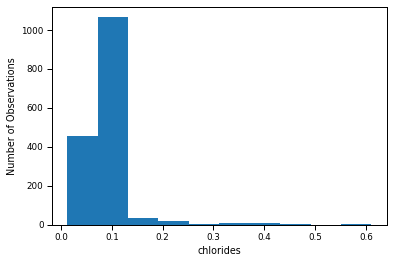

In [20]:
fig, ax = plt.subplots()
ax.hist(df.chlorides, label="chlorides", bins=10) #bins: kaç aralığa bölünecek
ax.set_xlabel("chlorides") #axis isimleri
ax.set_ylabel("Number of Observations")
plt.show()

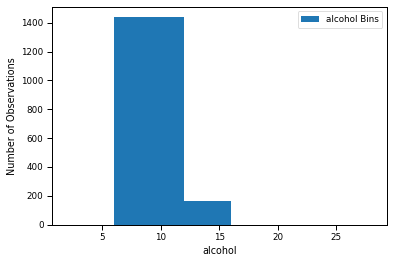

In [21]:
bins=[2,6,12,16,20,24,28] #bins'i manuel girdik.
fig, ax = plt.subplots()
ax.hist(df.alcohol, label="alcohol Bins", bins=bins) 
ax.set_xlabel("alcohol") #axis isimleri
ax.set_ylabel("Number of Observations")
plt.legend()
plt.show()

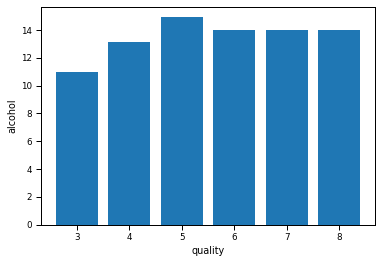

In [22]:
fig, ax = plt.subplots()
ax.bar(df.quality, df.alcohol)
ax.set_xlabel("quality")
ax.set_ylabel("alcohol")
plt.show()

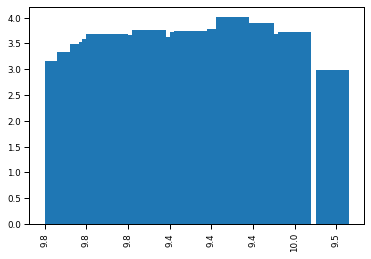

In [23]:
fig, ax = plt.subplots()
ax.bar(df.alcohol, df.pH)
ax.set_xticklabels(df.alcohol, rotation=90) # x eksenindeki yazıların yazı yönü.
fig.savefig("alcohol.png", dpi=500) #png formatında kaydeder.

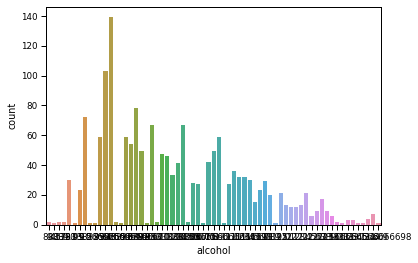

In [24]:
sns.set_palette("RdBu")
sns.countplot(x="alcohol", data=df)
plt.show()

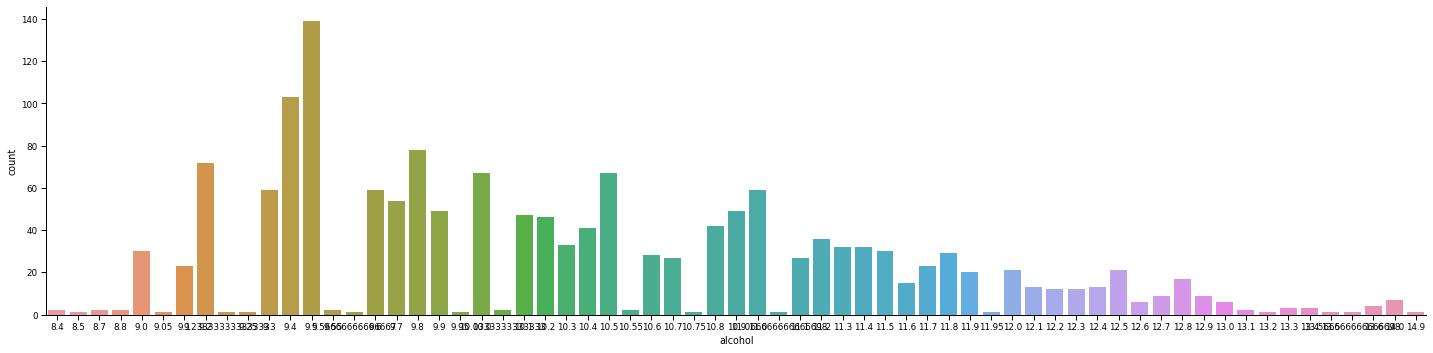

In [25]:
sns.catplot(x="alcohol", aspect=4, data=df, kind="count") #aspect = x ekseni, y ekseninin 3 katı kadar olsun.
plt.show()

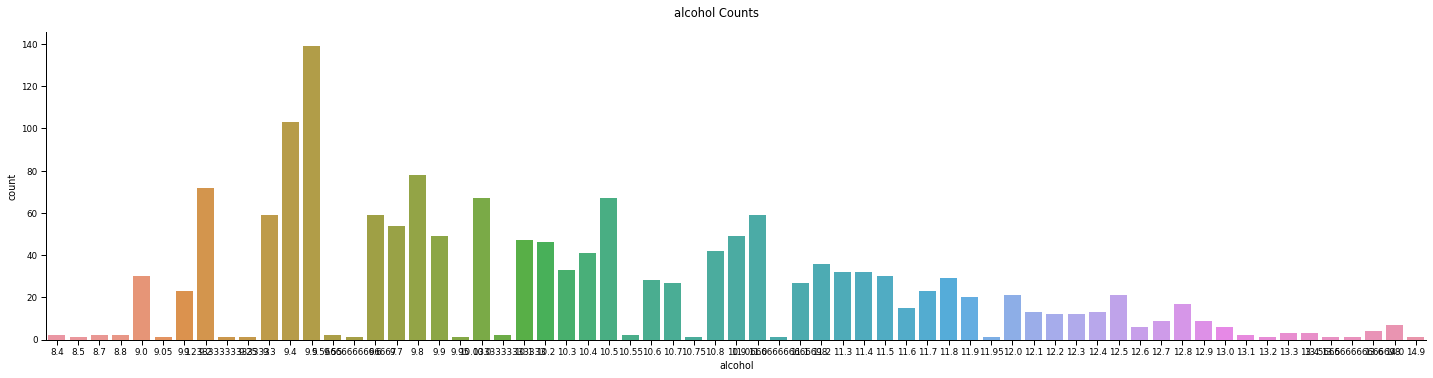

In [26]:
g = sns.catplot(x="alcohol", aspect=4, data=df, kind="count")
g.fig.suptitle("alcohol Counts", y=1.04) #ismi yukarı çıkarıyor.
plt.show()

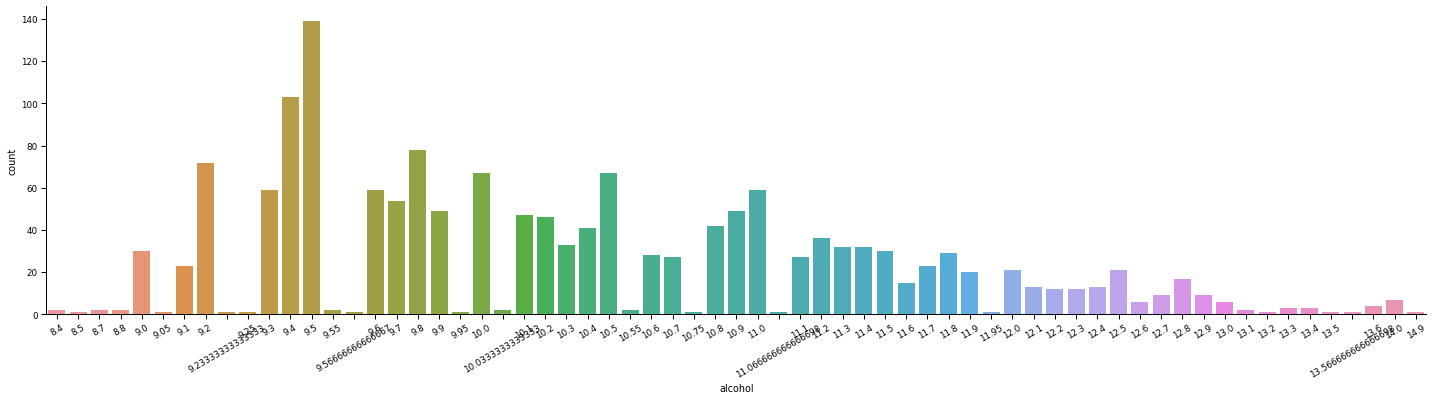

In [27]:
g = sns.catplot(x="alcohol", aspect=4, data=df, kind="count")
plt.xticks(rotation=30) #x eksenindeki isimleri 30 derece döndürür.
plt.show()

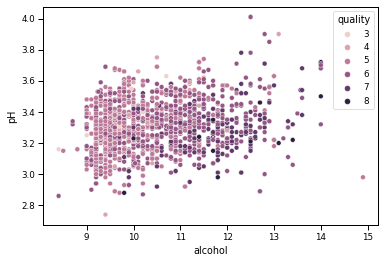

In [28]:
sns.scatterplot(x="alcohol", y="pH", data=df, hue="quality")
plt.show()

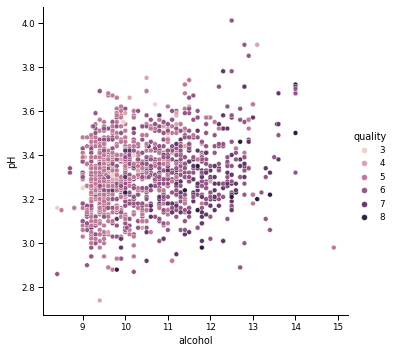

In [29]:
sns.relplot(x="alcohol", y="pH", data=df, hue="quality",
           kind="scatter")
plt.show()

In [30]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Yield  
0      9.4        5      0  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      0

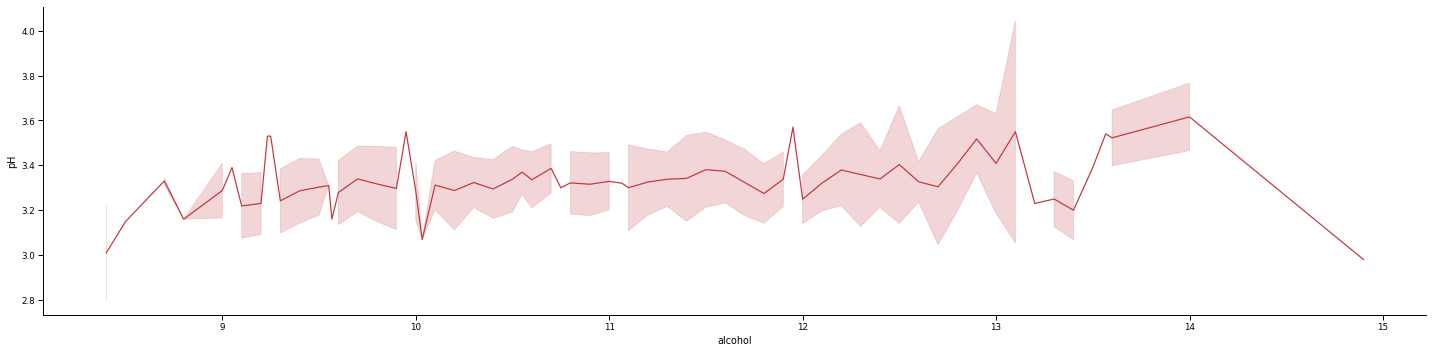

In [31]:
sns.relplot(x="alcohol", y="pH", data=df, kind="line", ci="sd", aspect = 4, markers=True, dashes=False)
plt.show()

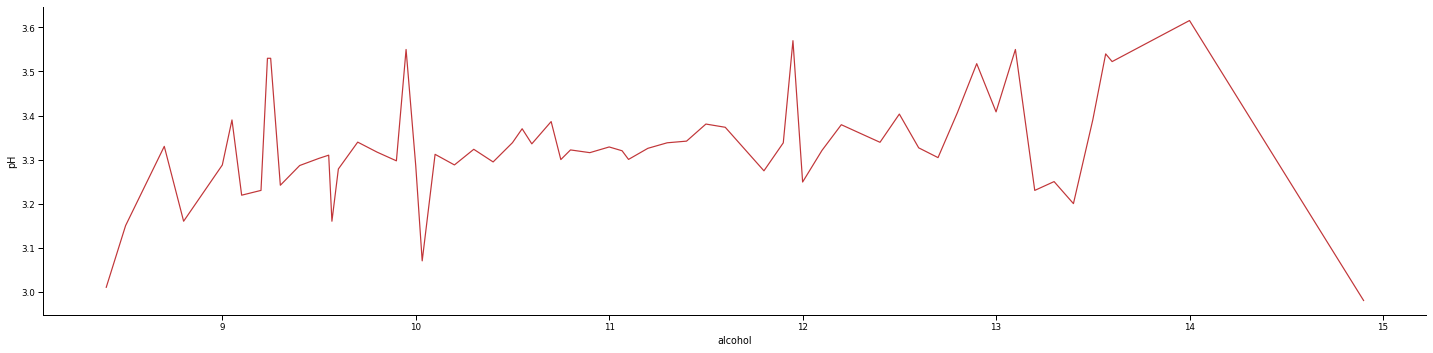

In [32]:
sns.relplot(x="alcohol", y="pH", data=df, kind="line", ci=None, aspect = 4, markers=True, dashes=False)
plt.show()

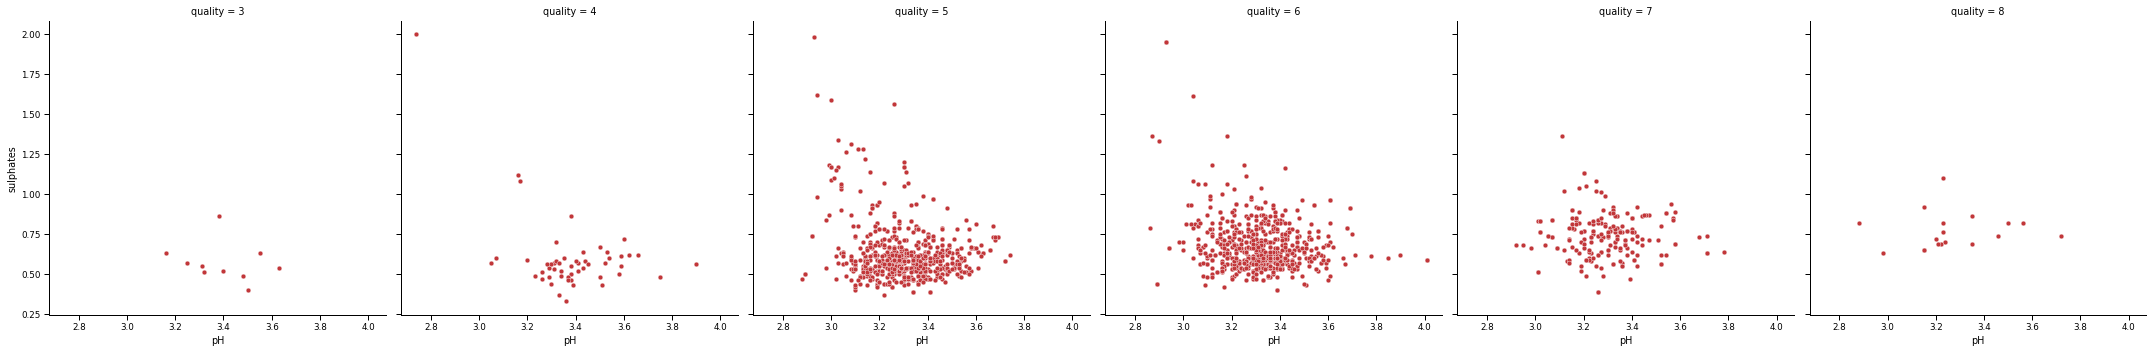

In [33]:
sns.relplot(x="pH", y="sulphates", data=df, kind="scatter", col="quality") #sulphates'a göre karşılaştırma
plt.show()

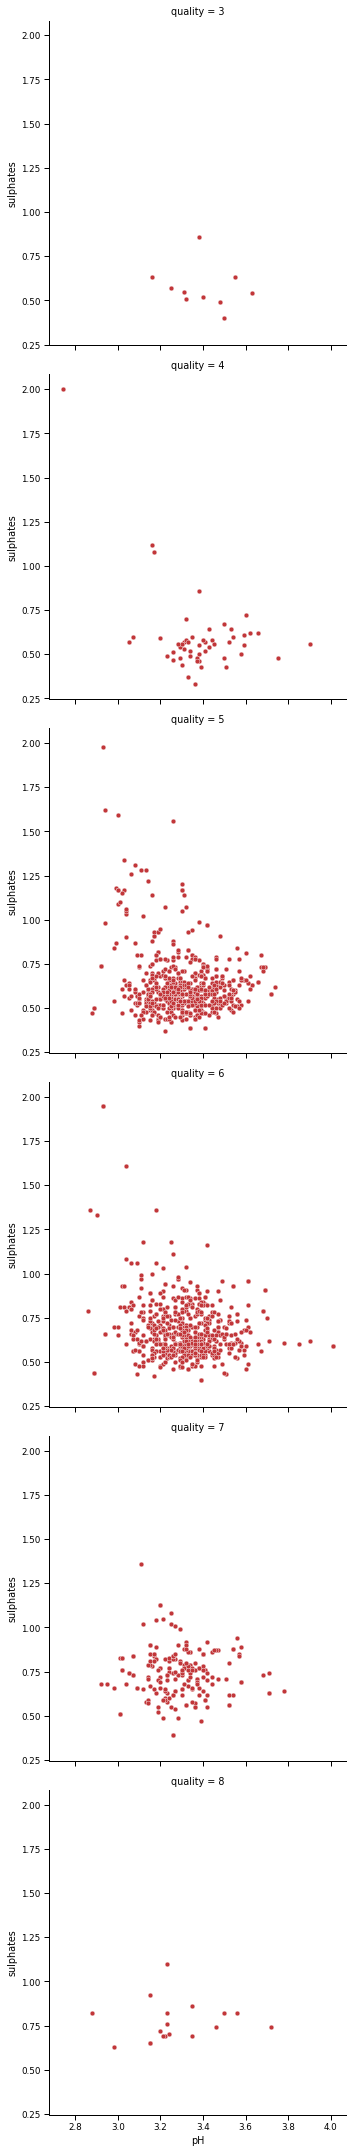

In [34]:
sns.relplot(x="pH", y="sulphates", data=df, kind="scatter", row="quality") #pH'e göre karşılaştırma
plt.show()

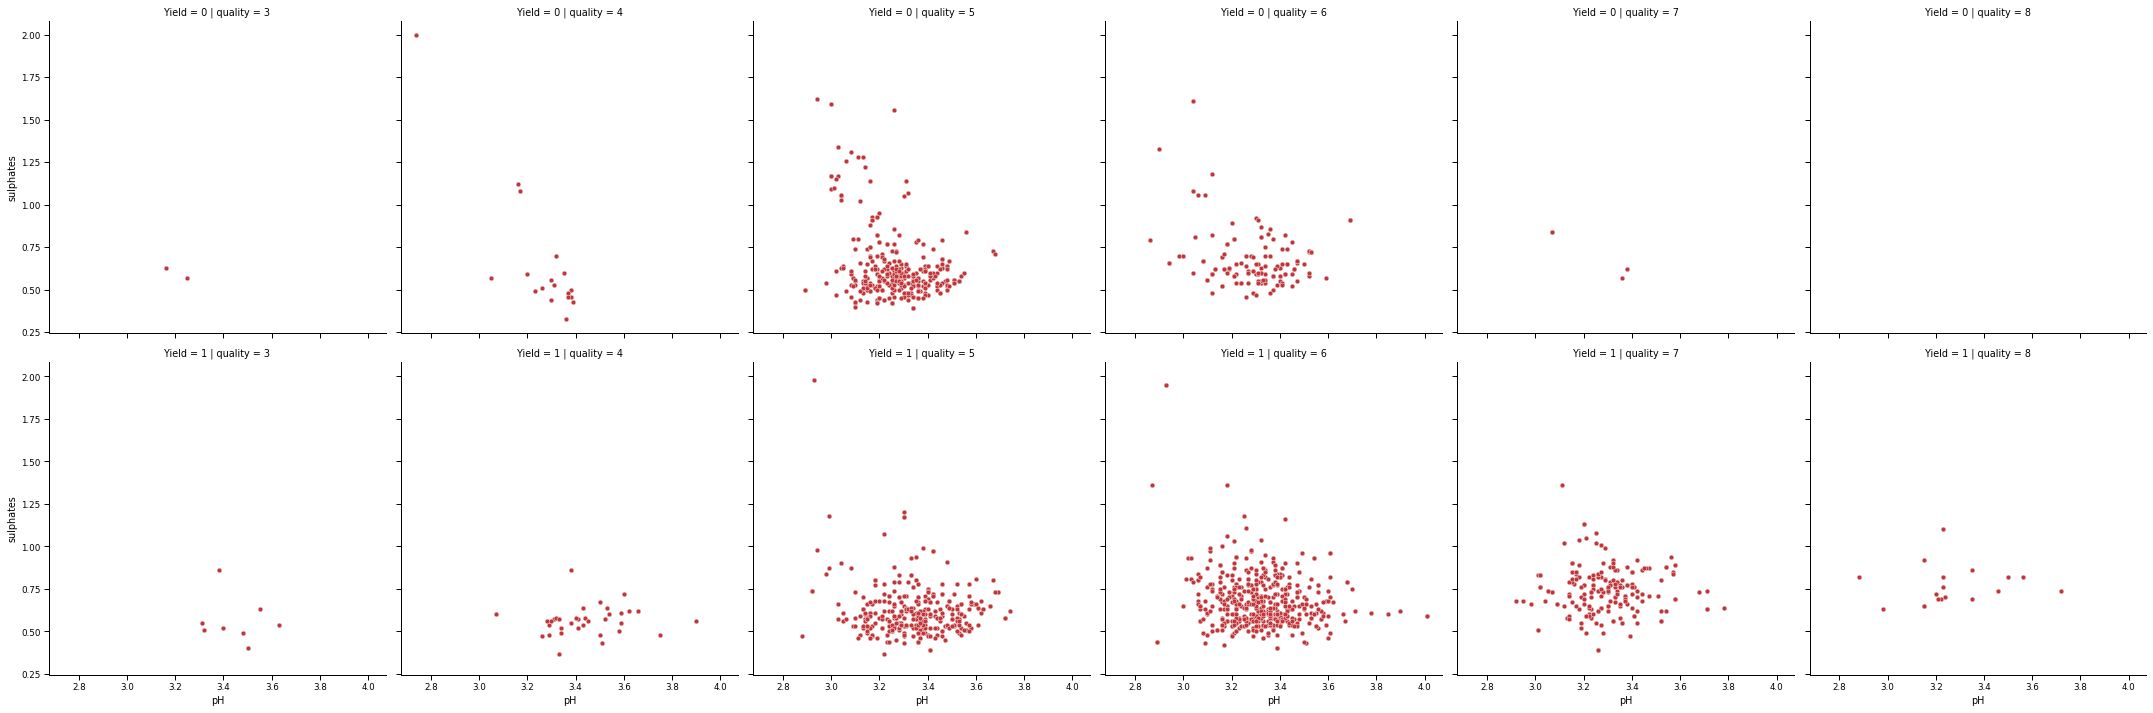

In [35]:
sns.relplot(x="pH", y="sulphates", data=df, kind="scatter",col="quality", row="Yield") 
plt.show()

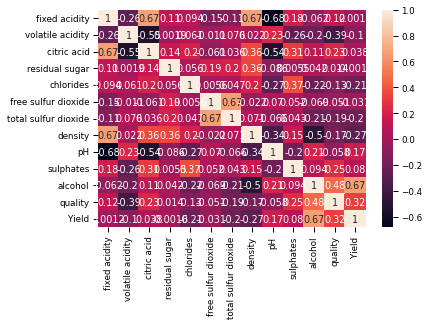

In [36]:
sns.set_palette("RdBu")
correlation=df.corr()
sns.heatmap(correlation, annot=True) #annot: corr degerlerini heatmap üzerine yazar.
plt.show()
#Renk ne kadar açıksa correlation o kadar yüksek demektir.

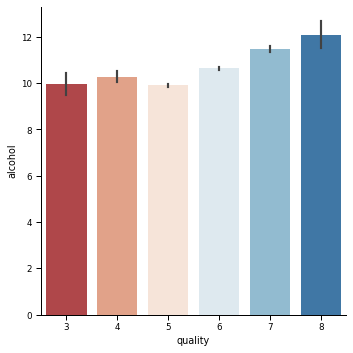

In [37]:
sns.catplot(x="quality",y="alcohol",data=df, kind="bar")
plt.show()

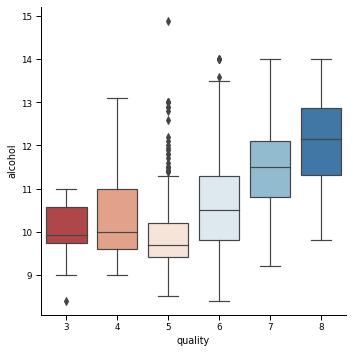

In [38]:
sns.catplot(x="quality",y="alcohol", data=df, kind="box")
plt.show()
#veri setinde bulunan kalite değerleri ve alcohol değerleri arasındaki ilişkiyi gösteren bir kutu grafiği oluşur. 
#Bu grafik kullanıcıya kalite değerleri ve alcohol değerleri arasındaki ilişkiyi gösterir ve verinin dağılımı hakkında bilgi verir. 
#Kutu grafiği, verinin medyan, aralık, eşikler ve diğer özelliklerini gösterir.

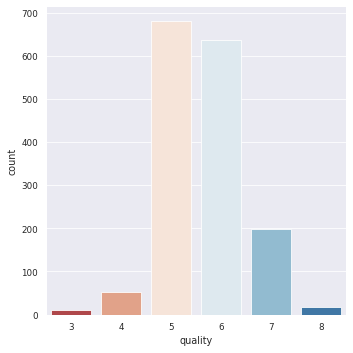

In [39]:
sns.set_style("darkgrid") #arka plan tasarımı
sns.catplot(x="quality", data=df, kind="count")
plt.show()

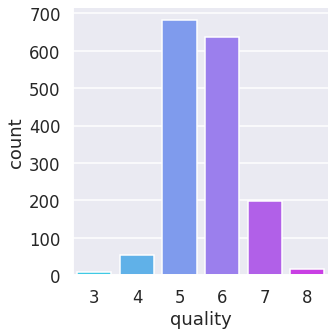

In [40]:
sns.set_context("talk") #Font size
sns.set_palette("cool") #color design
sns.catplot(x="quality", data=df, kind="count")
plt.show()

In [41]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Yield  
0      9.4        5      0  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      0

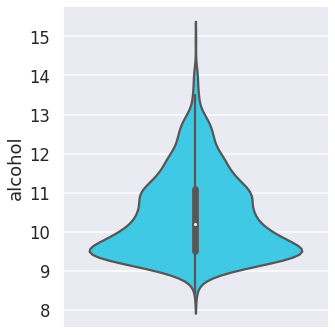

In [42]:
sns.catplot(y = "alcohol", kind = "violin", data=df);

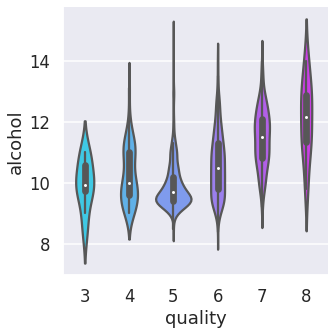

In [43]:
sns.catplot(x="quality", y="alcohol", kind="violin", data=df);

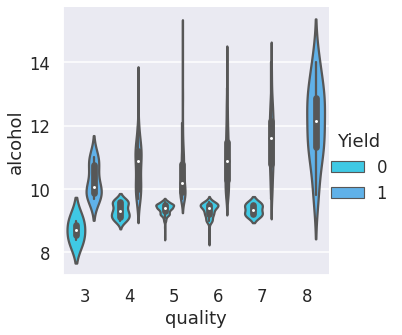

In [44]:
sns.catplot(x="quality", y="alcohol", hue="Yield", kind="violin", data=df);

In [45]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Yield  
0      9.4        5      0  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      0

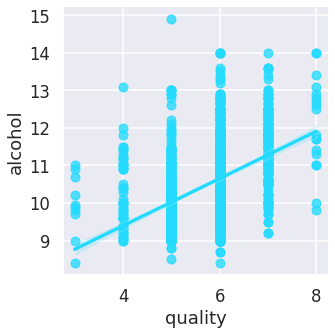

In [46]:
sns.lmplot(x = "quality", y = "alcohol", data=df);
#lmplot = lineer model plot

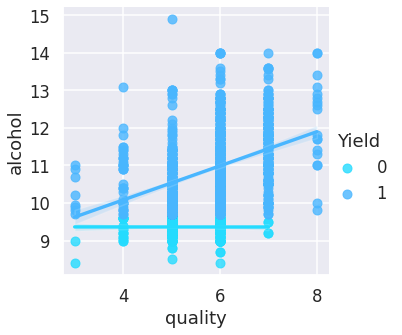

In [47]:
sns.lmplot(x="quality", y="alcohol", hue="Yield", data=df);

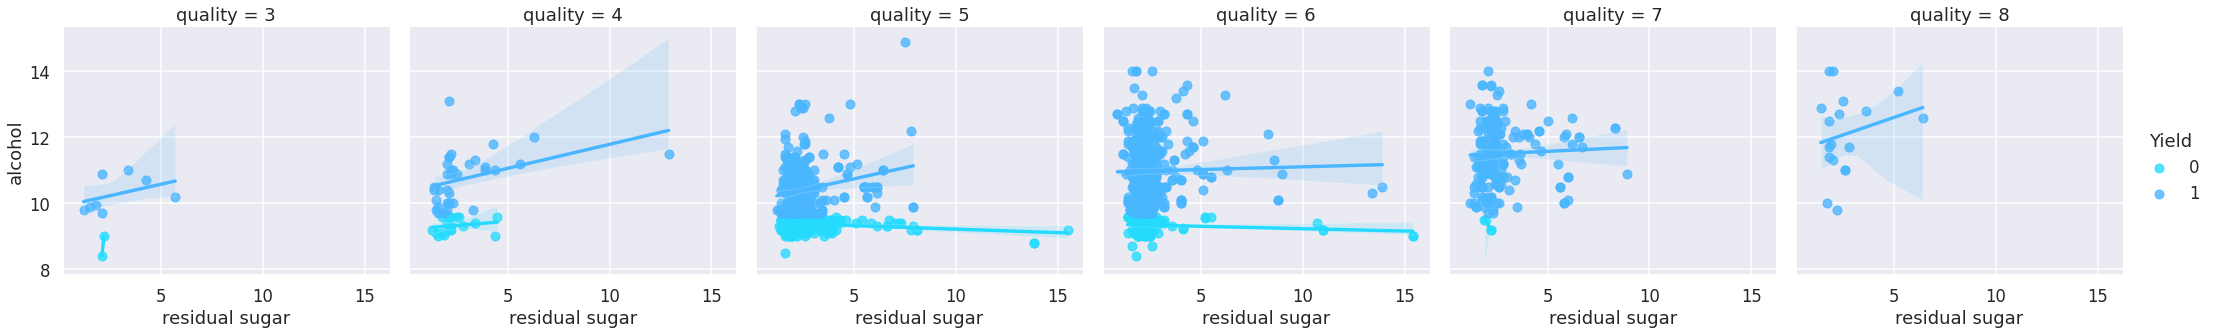

In [48]:
sns.lmplot(x="residual sugar", y="alcohol", hue="Yield", col="quality", data=df);

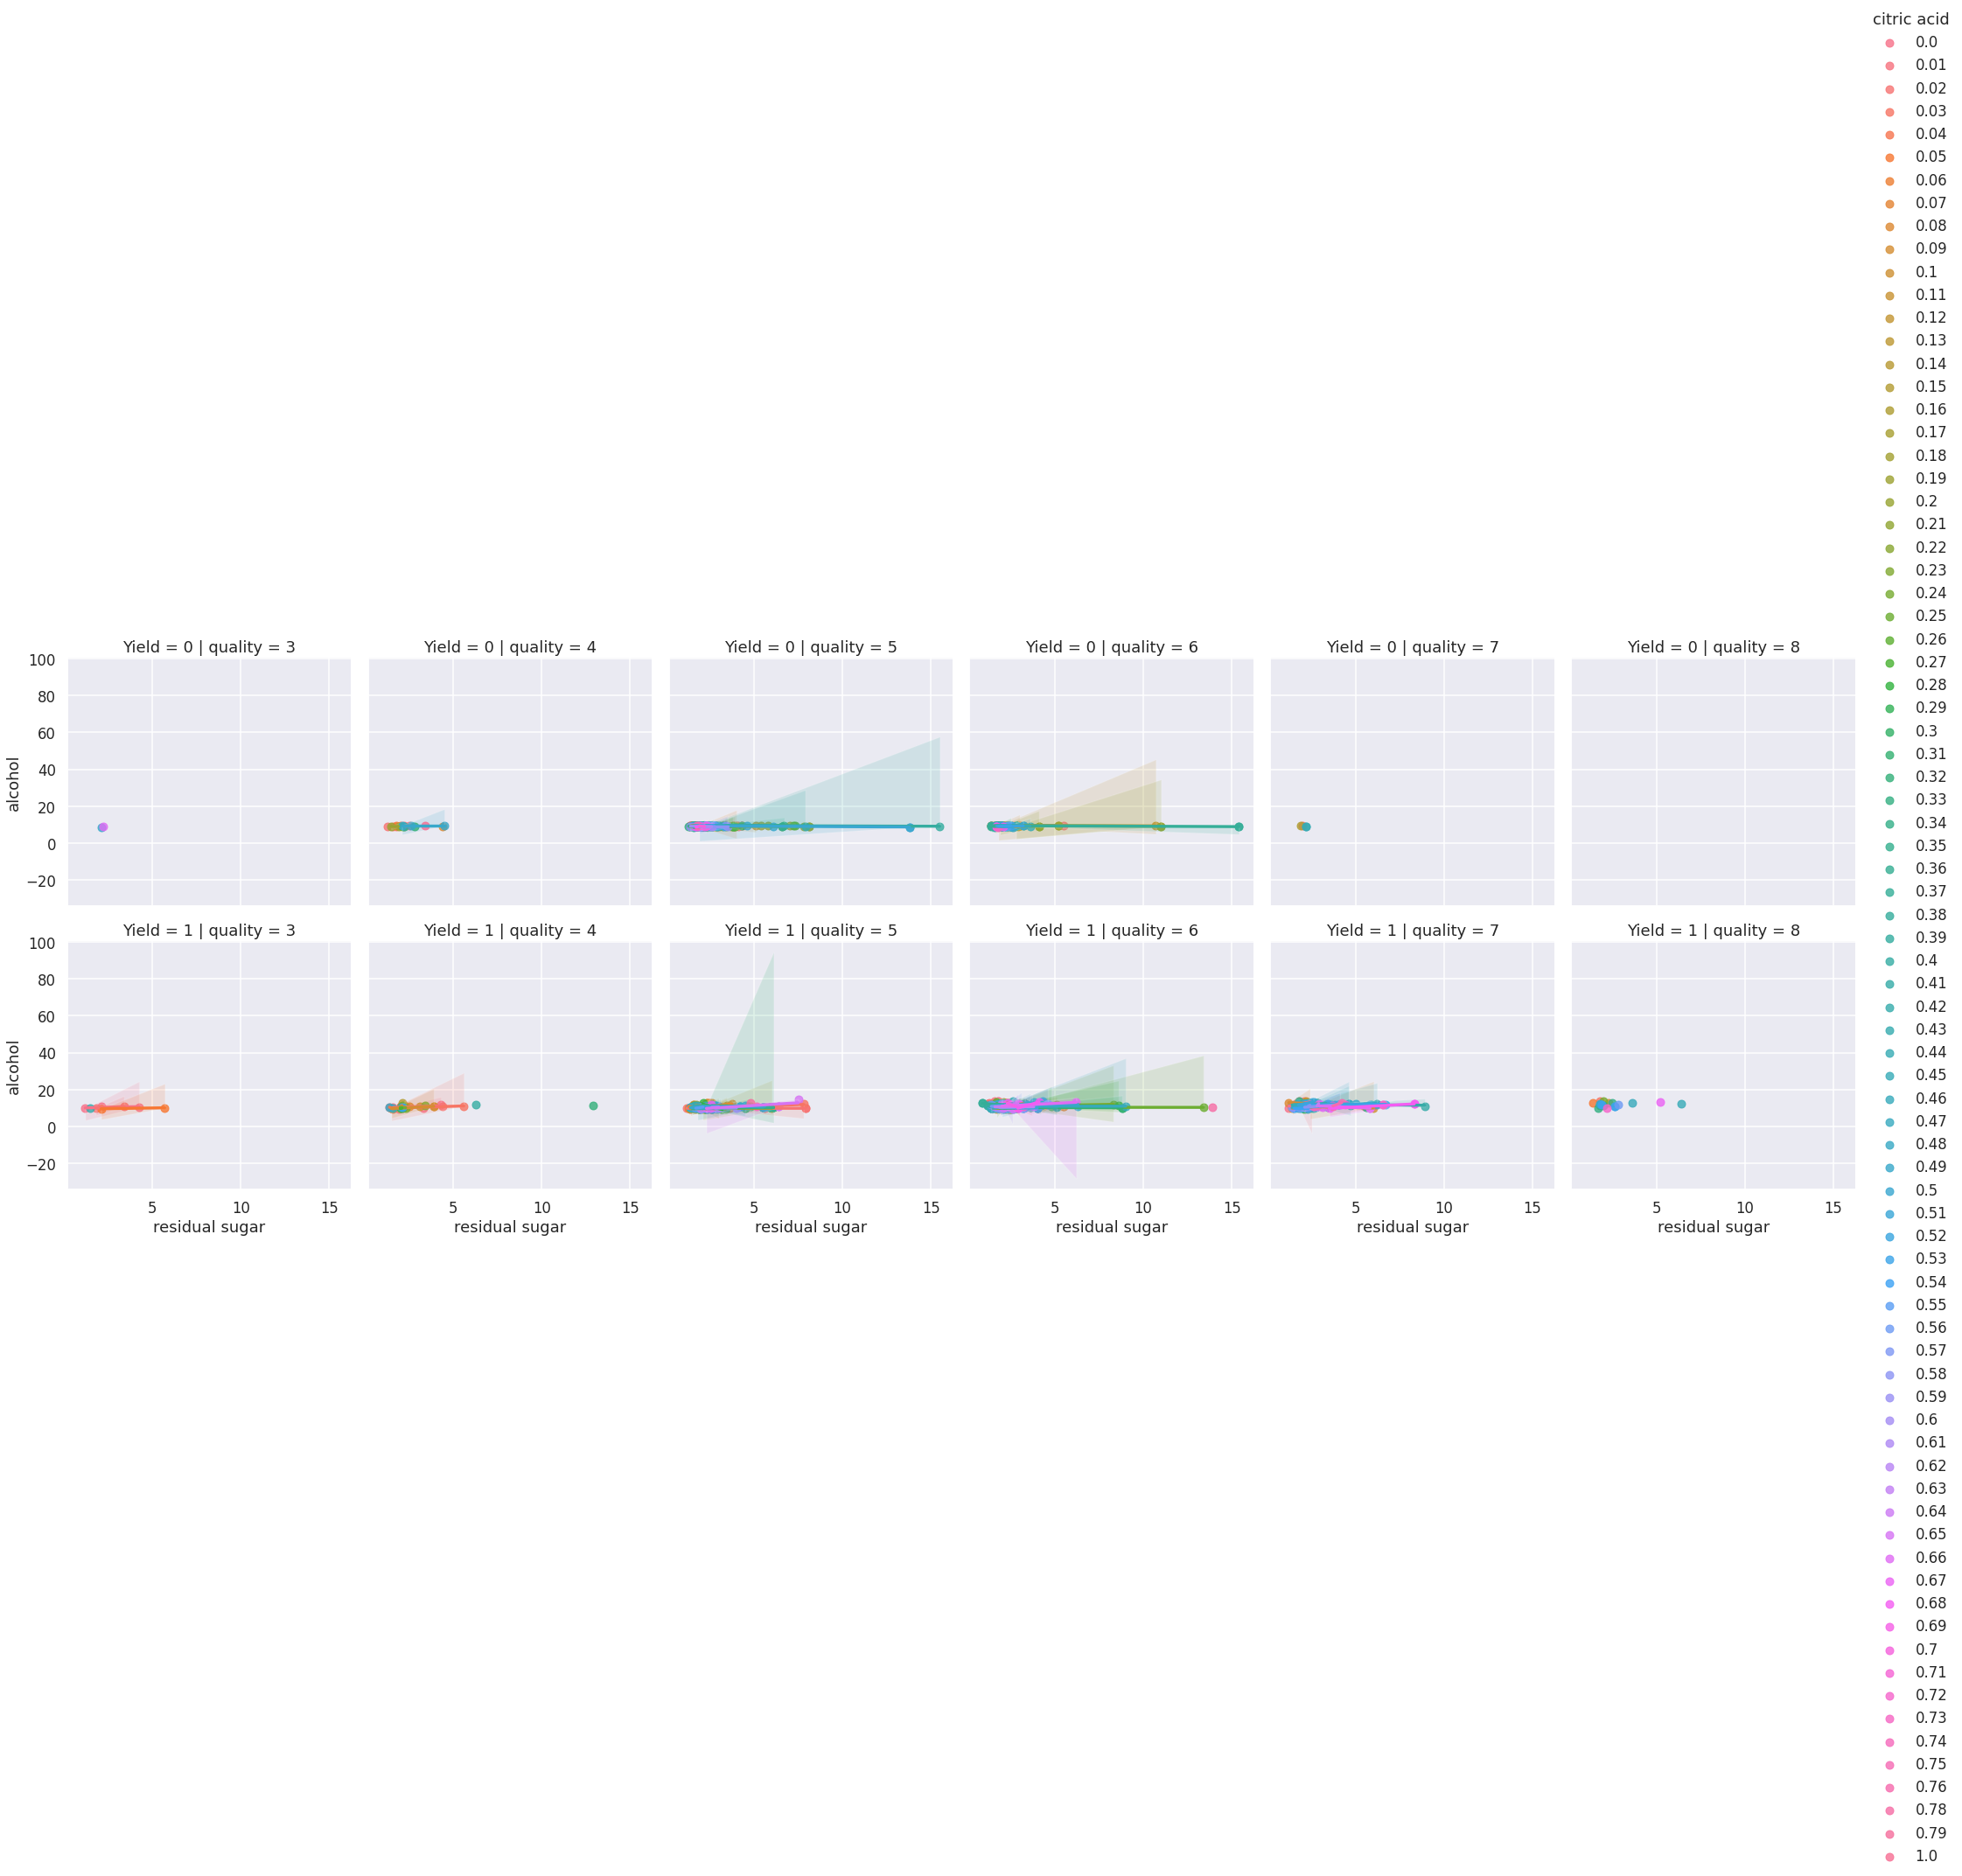

In [49]:
sns.lmplot(x="residual sugar", y="alcohol", hue="citric acid", col="quality", row="Yield", data=df);

In [50]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Yield  
0      9.4        5      0  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      0

In [51]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Yield                     int64
dtype: object

In [52]:
df.shape

(1599, 13)

In [53]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   
Yield                 1599.0   0.688555   0.463229  0.00000   0.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000  
Yield                  1.00000   1.000000    1.00000

In [54]:
df.groupby(["citric acid"]).mean().T

citric acid                0.00       0.01       0.02       0.03       0.04  \
fixed acidity          6.997727   7.072727   6.994000   7.060000   7.144828   
volatile acidity       0.692159   0.634242   0.650300   0.679167   0.642069   
residual sugar         2.238636   2.109091   2.356000   2.420000   2.086207   
chlorides              0.083371   0.073364   0.076620   0.075767   0.076448   
free sulfur dioxide   15.303030  16.727273  17.920000  16.900000  13.103448   
total sulfur dioxide  32.007576  35.303030  41.480000  46.200000  38.586207   
density                0.995917   0.995298   0.996132   0.995819   0.996315   
pH                     3.456212   3.427576   3.429400   3.427333   3.430000   
sulphates              0.604621   0.592727   0.633400   0.541000   0.600690   
alcohol               10.534091  10.978788  10.373333  10.500000   9.993103   
quality                5.409091   5.757576   5.560000   5.333333   5.275862   
Yield                  0.704545   0.939394   0.780000   0.766667   0.482759   

citric acid                0.05       0.06       0.07       0.08       0.09  \
fixed acidity          7.305000   7.183333   7.377273   6.818182   7.010000   
volatile acidity       0.739750   0.629583   0.654091   0.616061   0.639667   
residual sugar         2.610000   2.520833   2.300000   2.322727   2.500000   
chlorides              0.077200   0.071917   0.084227   0.077303   0.083367   
free sulfur dioxide   11.850000  15.458333  14.318182  16.727273  13.933333   
total sulfur dioxide  32.850000  42.791667  39.545455  40.969697  39.033333   
density                0.996139   0.996157   0.996546   0.995497   0.995688   
pH                     3.389000   3.425000   3.370000   3.376364   3.412000   
sulphates              0.597500   0.601667   0.619545   0.596667   0.608000   
alcohol               10.465000  10.262500  10.300000  10.406061  10.783333   
quality                5.200000   5.500000   5.500000   5.484848   5.566667   
Yield                  0.850000   0.750000   0.727273   0.666667   0.833333   

citric acid           ...     0.70     0.71     0.72       0.73      0.74  \
fixed acidity         ...   7.9500  11.5000  12.6000  10.633333  12.77500   
volatile acidity      ...   0.5450   0.5400   0.3100   0.443333   0.35250   
residual sugar        ...   2.0500   4.4000   2.2000   5.433333   3.03750   
chlorides             ...   0.2810   0.1240   0.0720   0.071333   0.09125   
free sulfur dioxide   ...  23.5000   6.0000   6.0000  27.333333   7.25000   
total sulfur dioxide  ...  98.0000  15.0000  29.0000  58.000000  22.00000   
density               ...   0.9973   0.9984   0.9987   0.998867   0.99980   
pH                    ...   3.1050   3.0100   2.8800   3.170000   3.12000   
sulphates             ...   0.9050   0.8300   0.8200   0.786667   0.73750   
alcohol               ...   9.2000  11.8000   9.8000  11.733333  10.30000   
quality               ...   5.0000   7.0000   8.0000   6.666667   6.25000   
Yield                 ...   0.0000   1.0000   1.0000   1.000000   0.75000   

citric acid              0.75       0.76      0.78     0.79     1.00  
fixed acidity         13.3000  11.766667   5.60000  13.5000   9.2000  
volatile acidity       0.2900   0.488333   0.31000   0.5300   0.5200  
residual sugar         2.8000   3.233333  13.90000   4.8000   3.4000  
chlorides              0.0840   0.259000   0.07400   0.1200   0.6100  
free sulfur dioxide   23.0000   7.000000  23.00000  23.0000  32.0000  
total sulfur dioxide  43.0000  42.000000  92.00000  77.0000  69.0000  
density                0.9986   1.000133   0.99677   1.0018   0.9996  
pH                     3.0400   3.076667   3.39000   3.1800   2.7400  
sulphates              0.6800   0.846667   0.48000   0.7700   2.0000  
alcohol               11.4000  11.200000  10.50000  13.0000   9.4000  
quality                7.0000   6.333333   6.00000   5.0000   4.0000  
Yield                  1.0000   0.666667   1.00000   1.0000   0.0000  

[12 rows x 80 colu

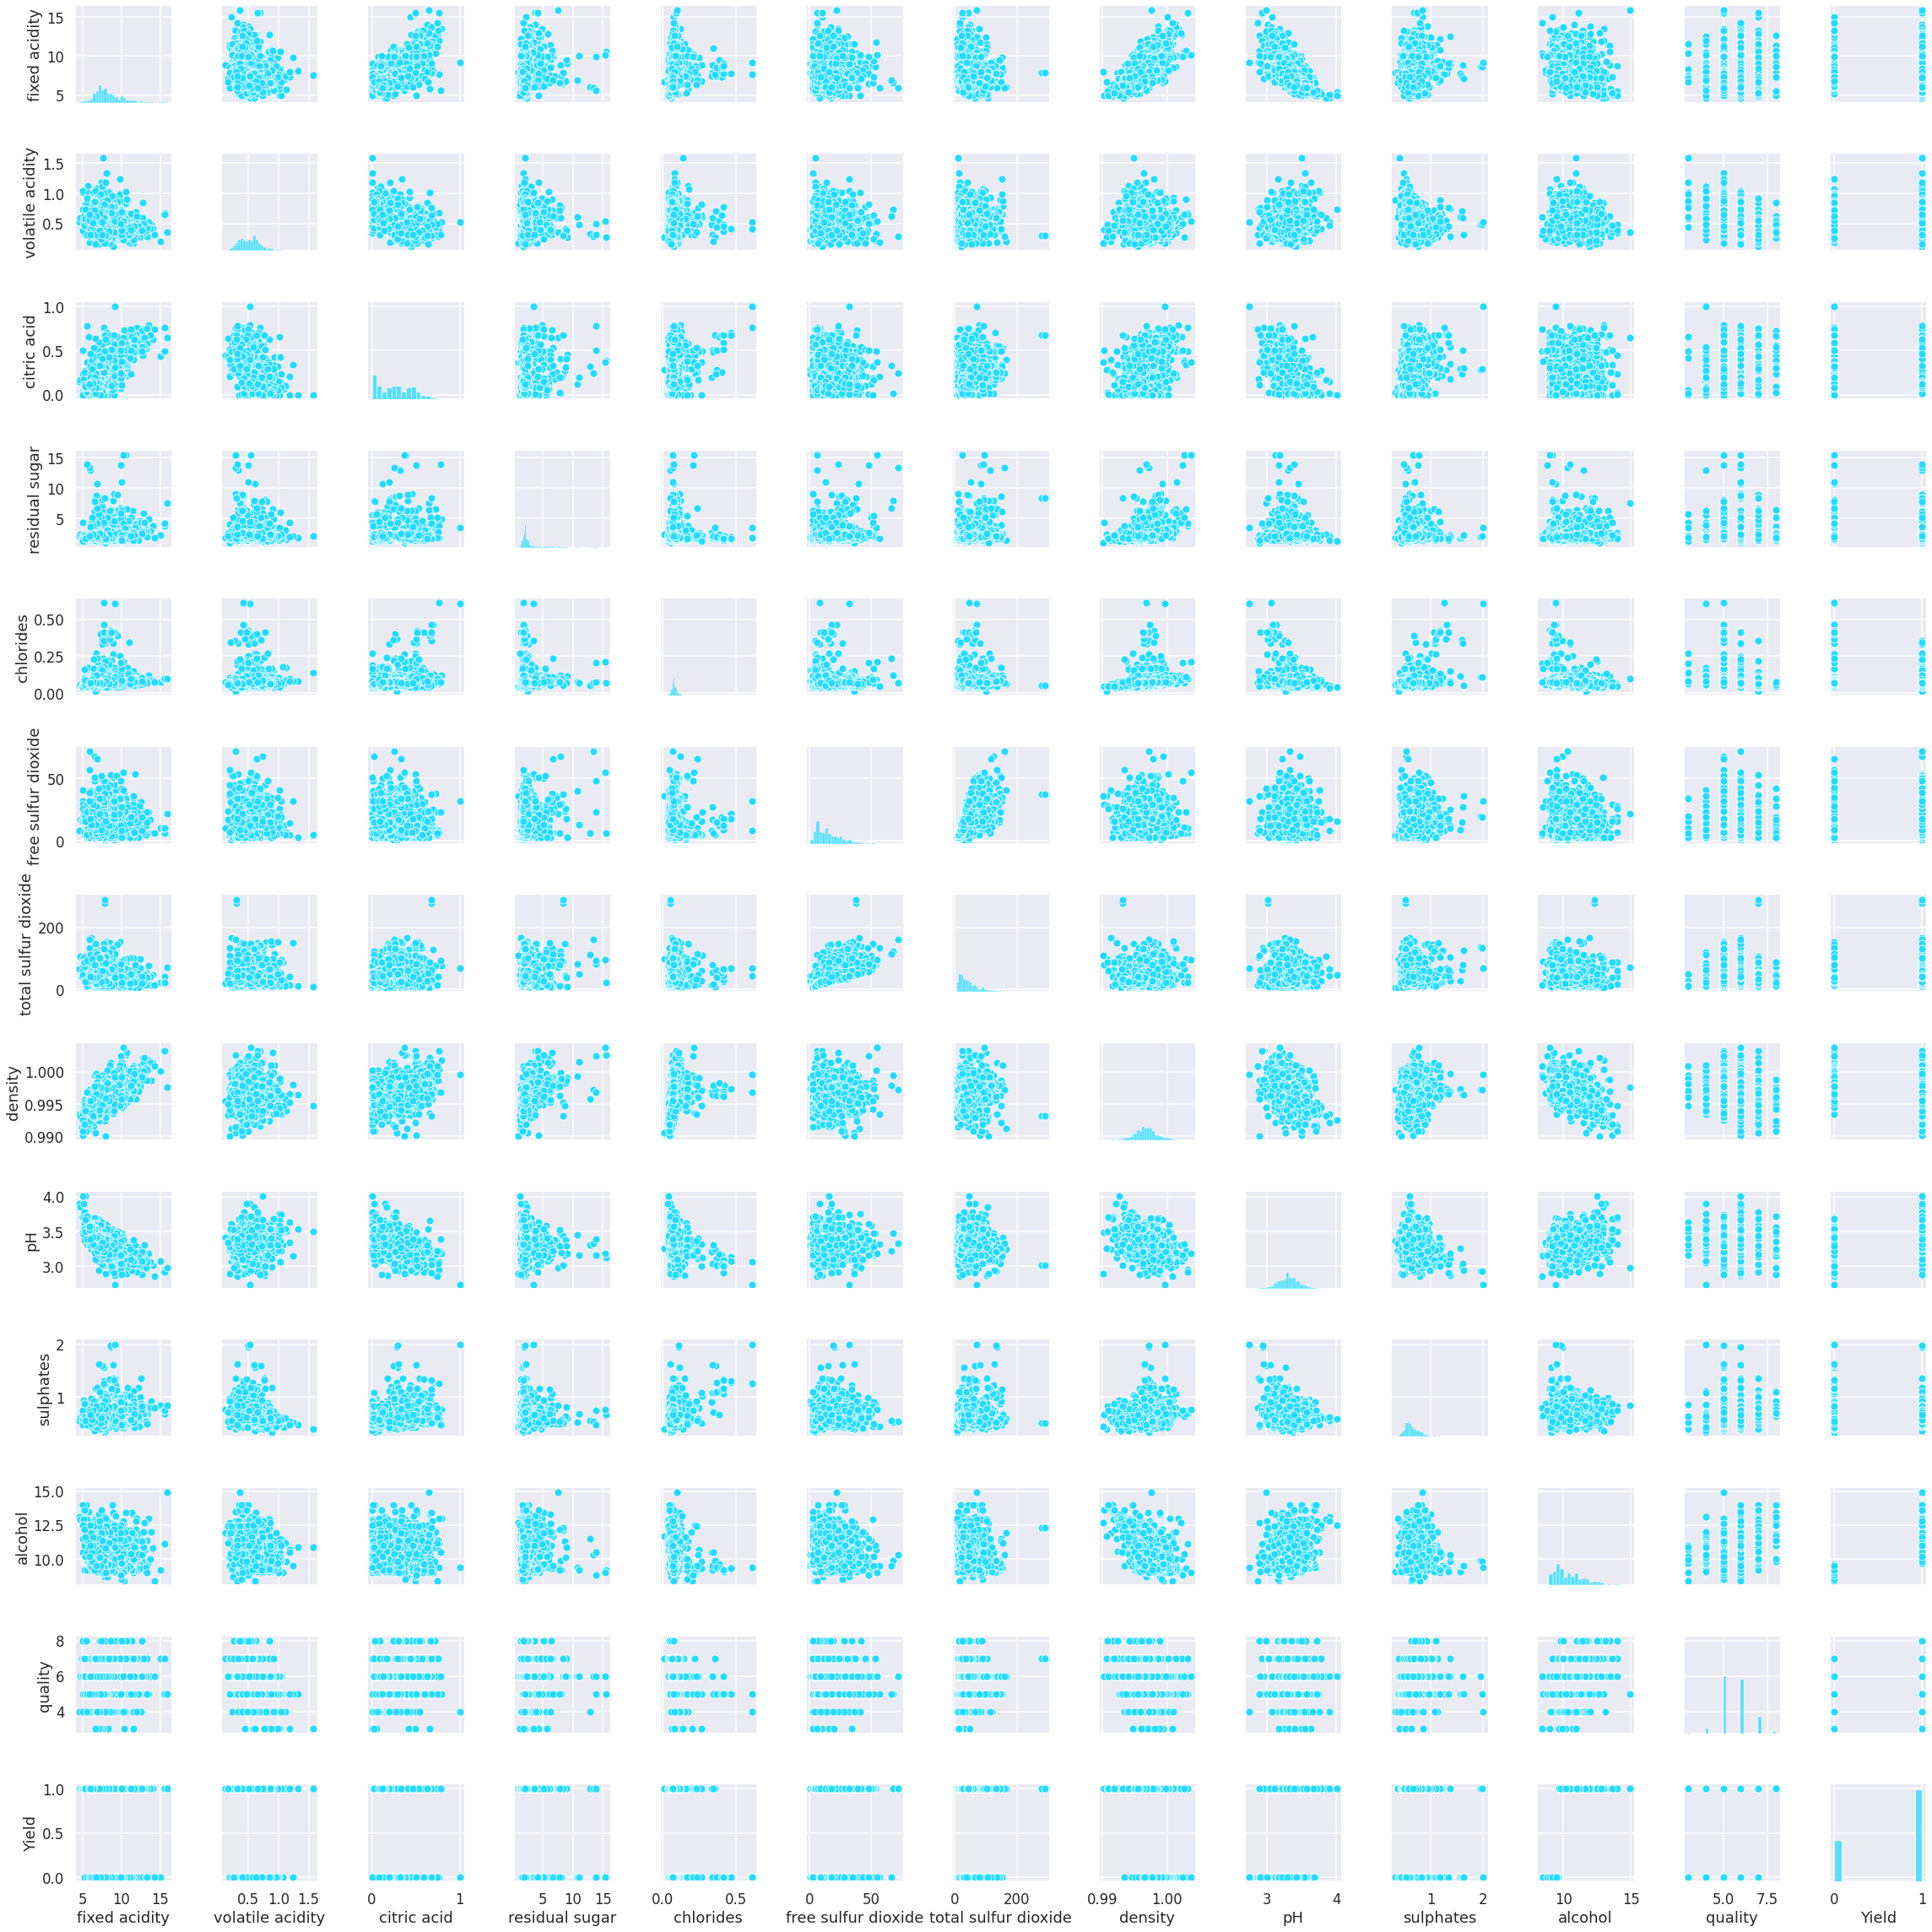

In [55]:
sns.pairplot(df);

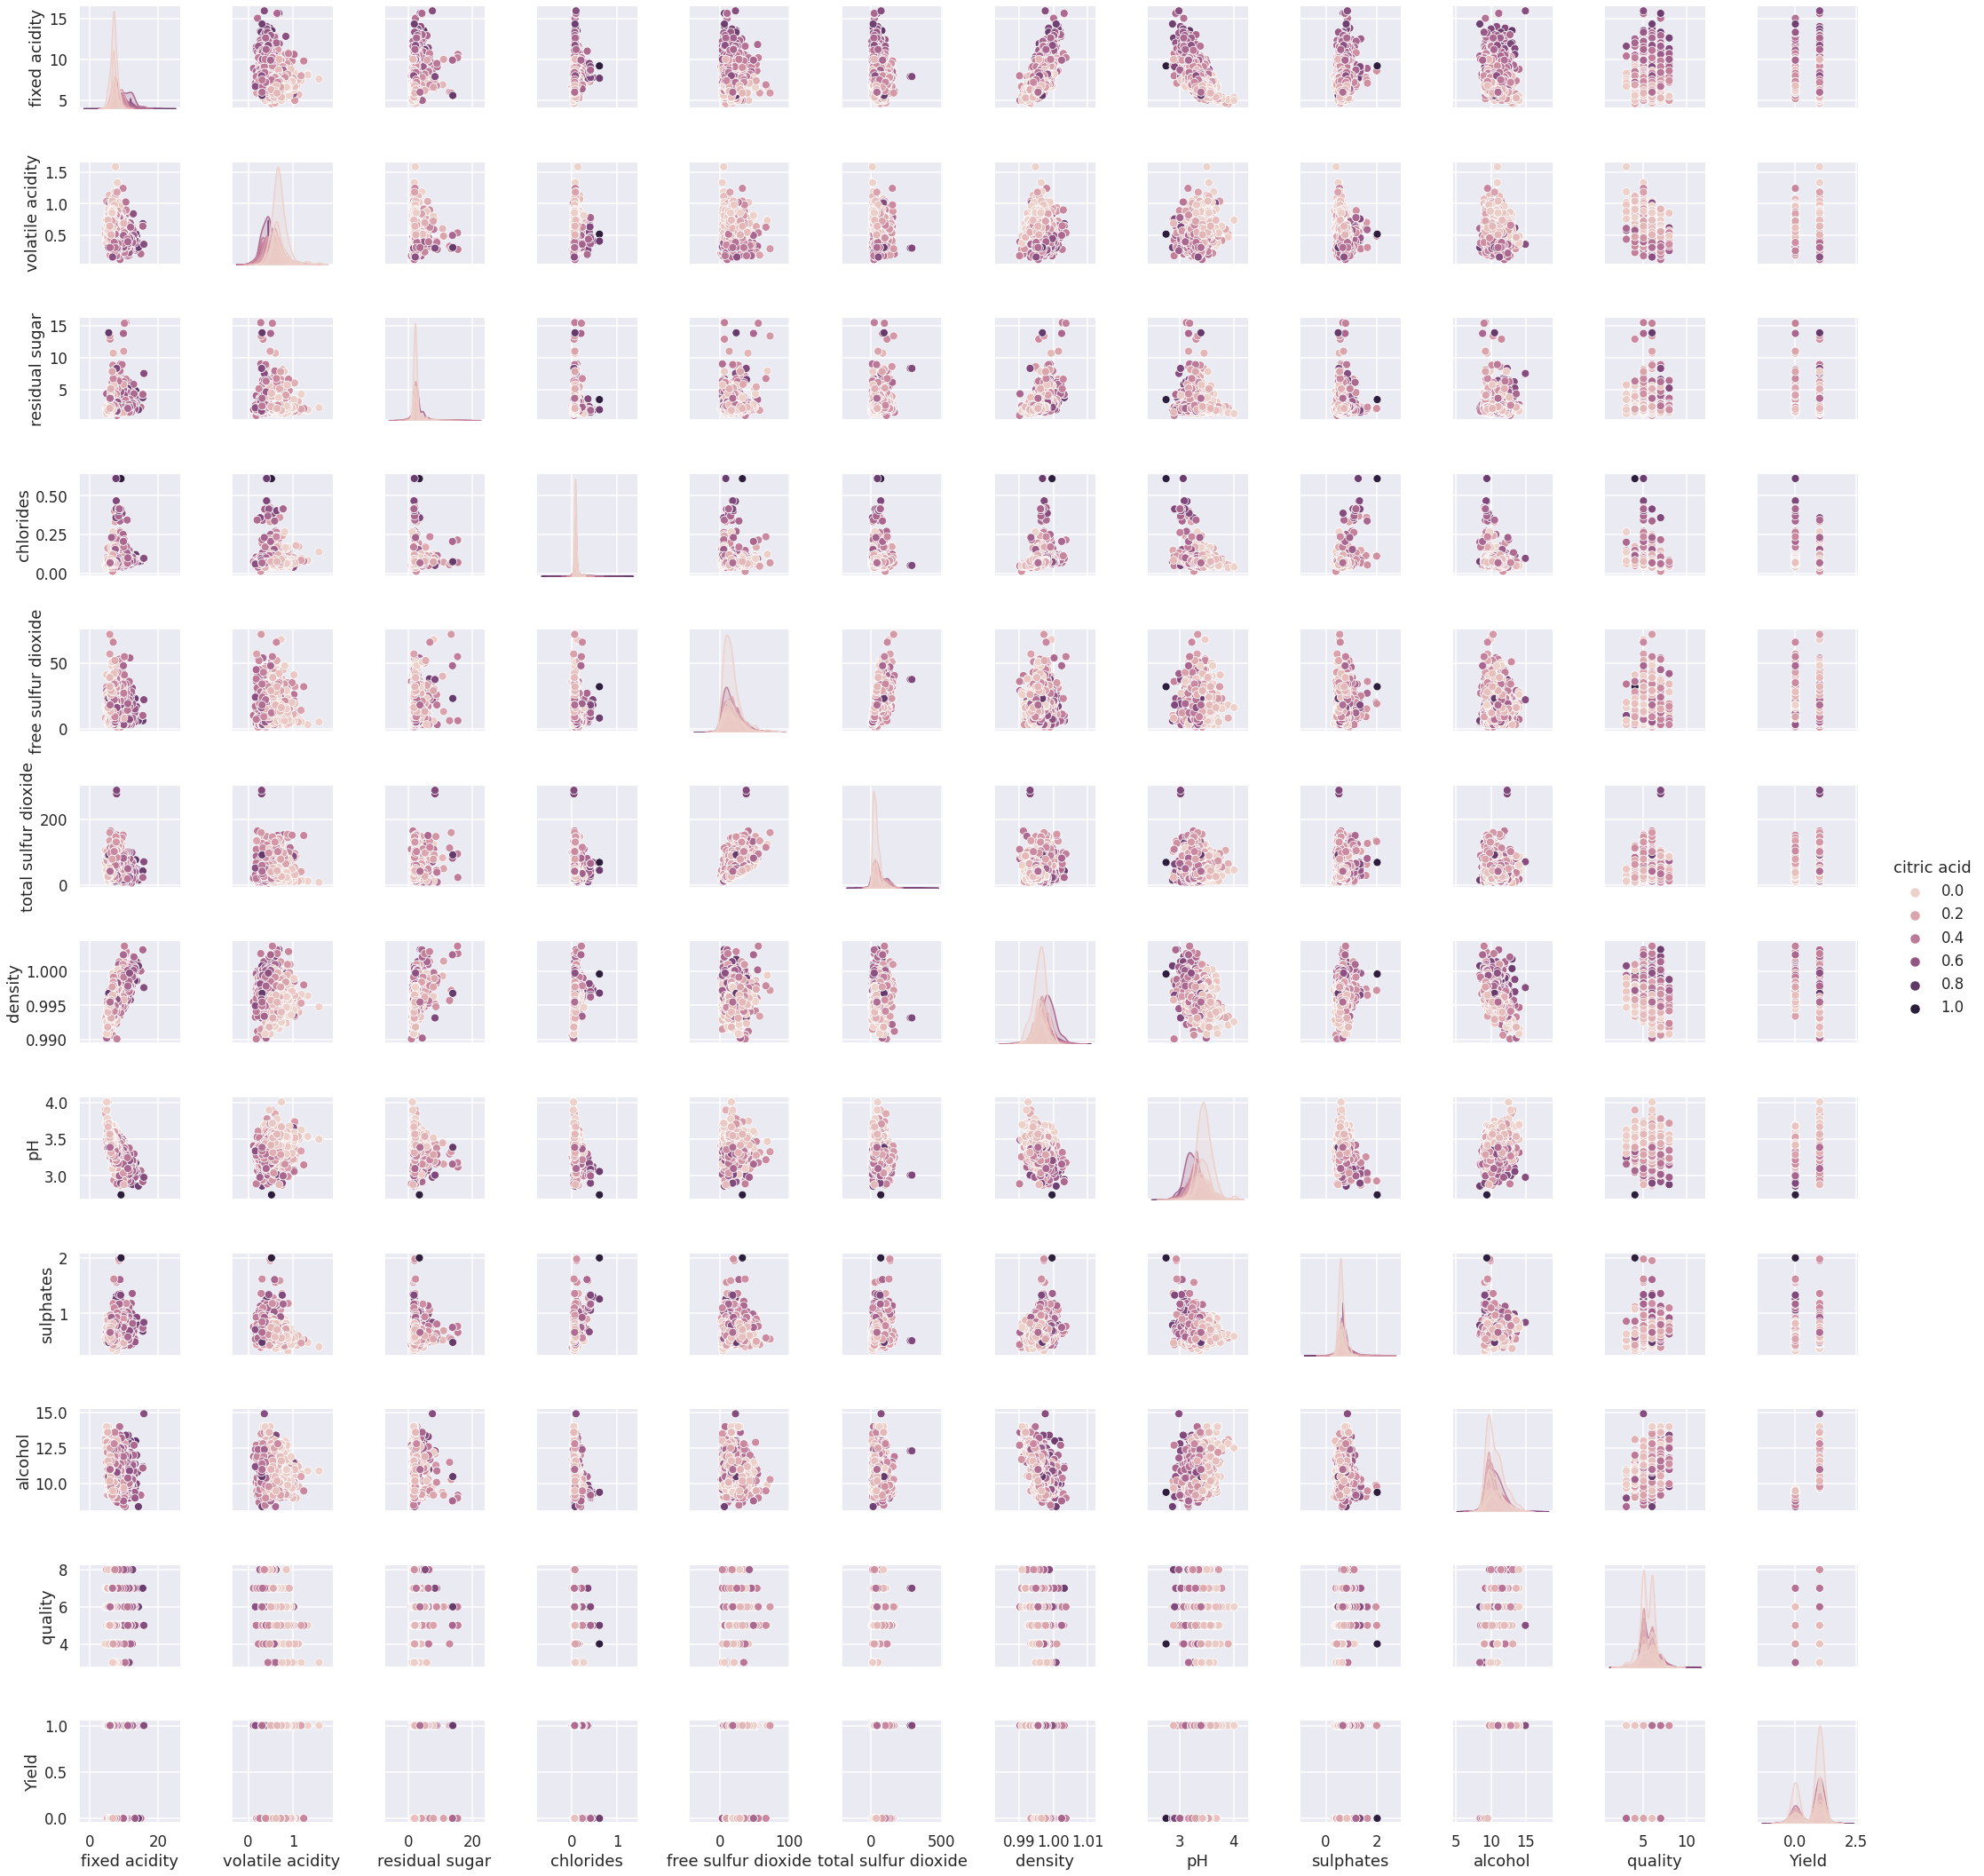

In [56]:
sns.pairplot(df, hue="citric acid");

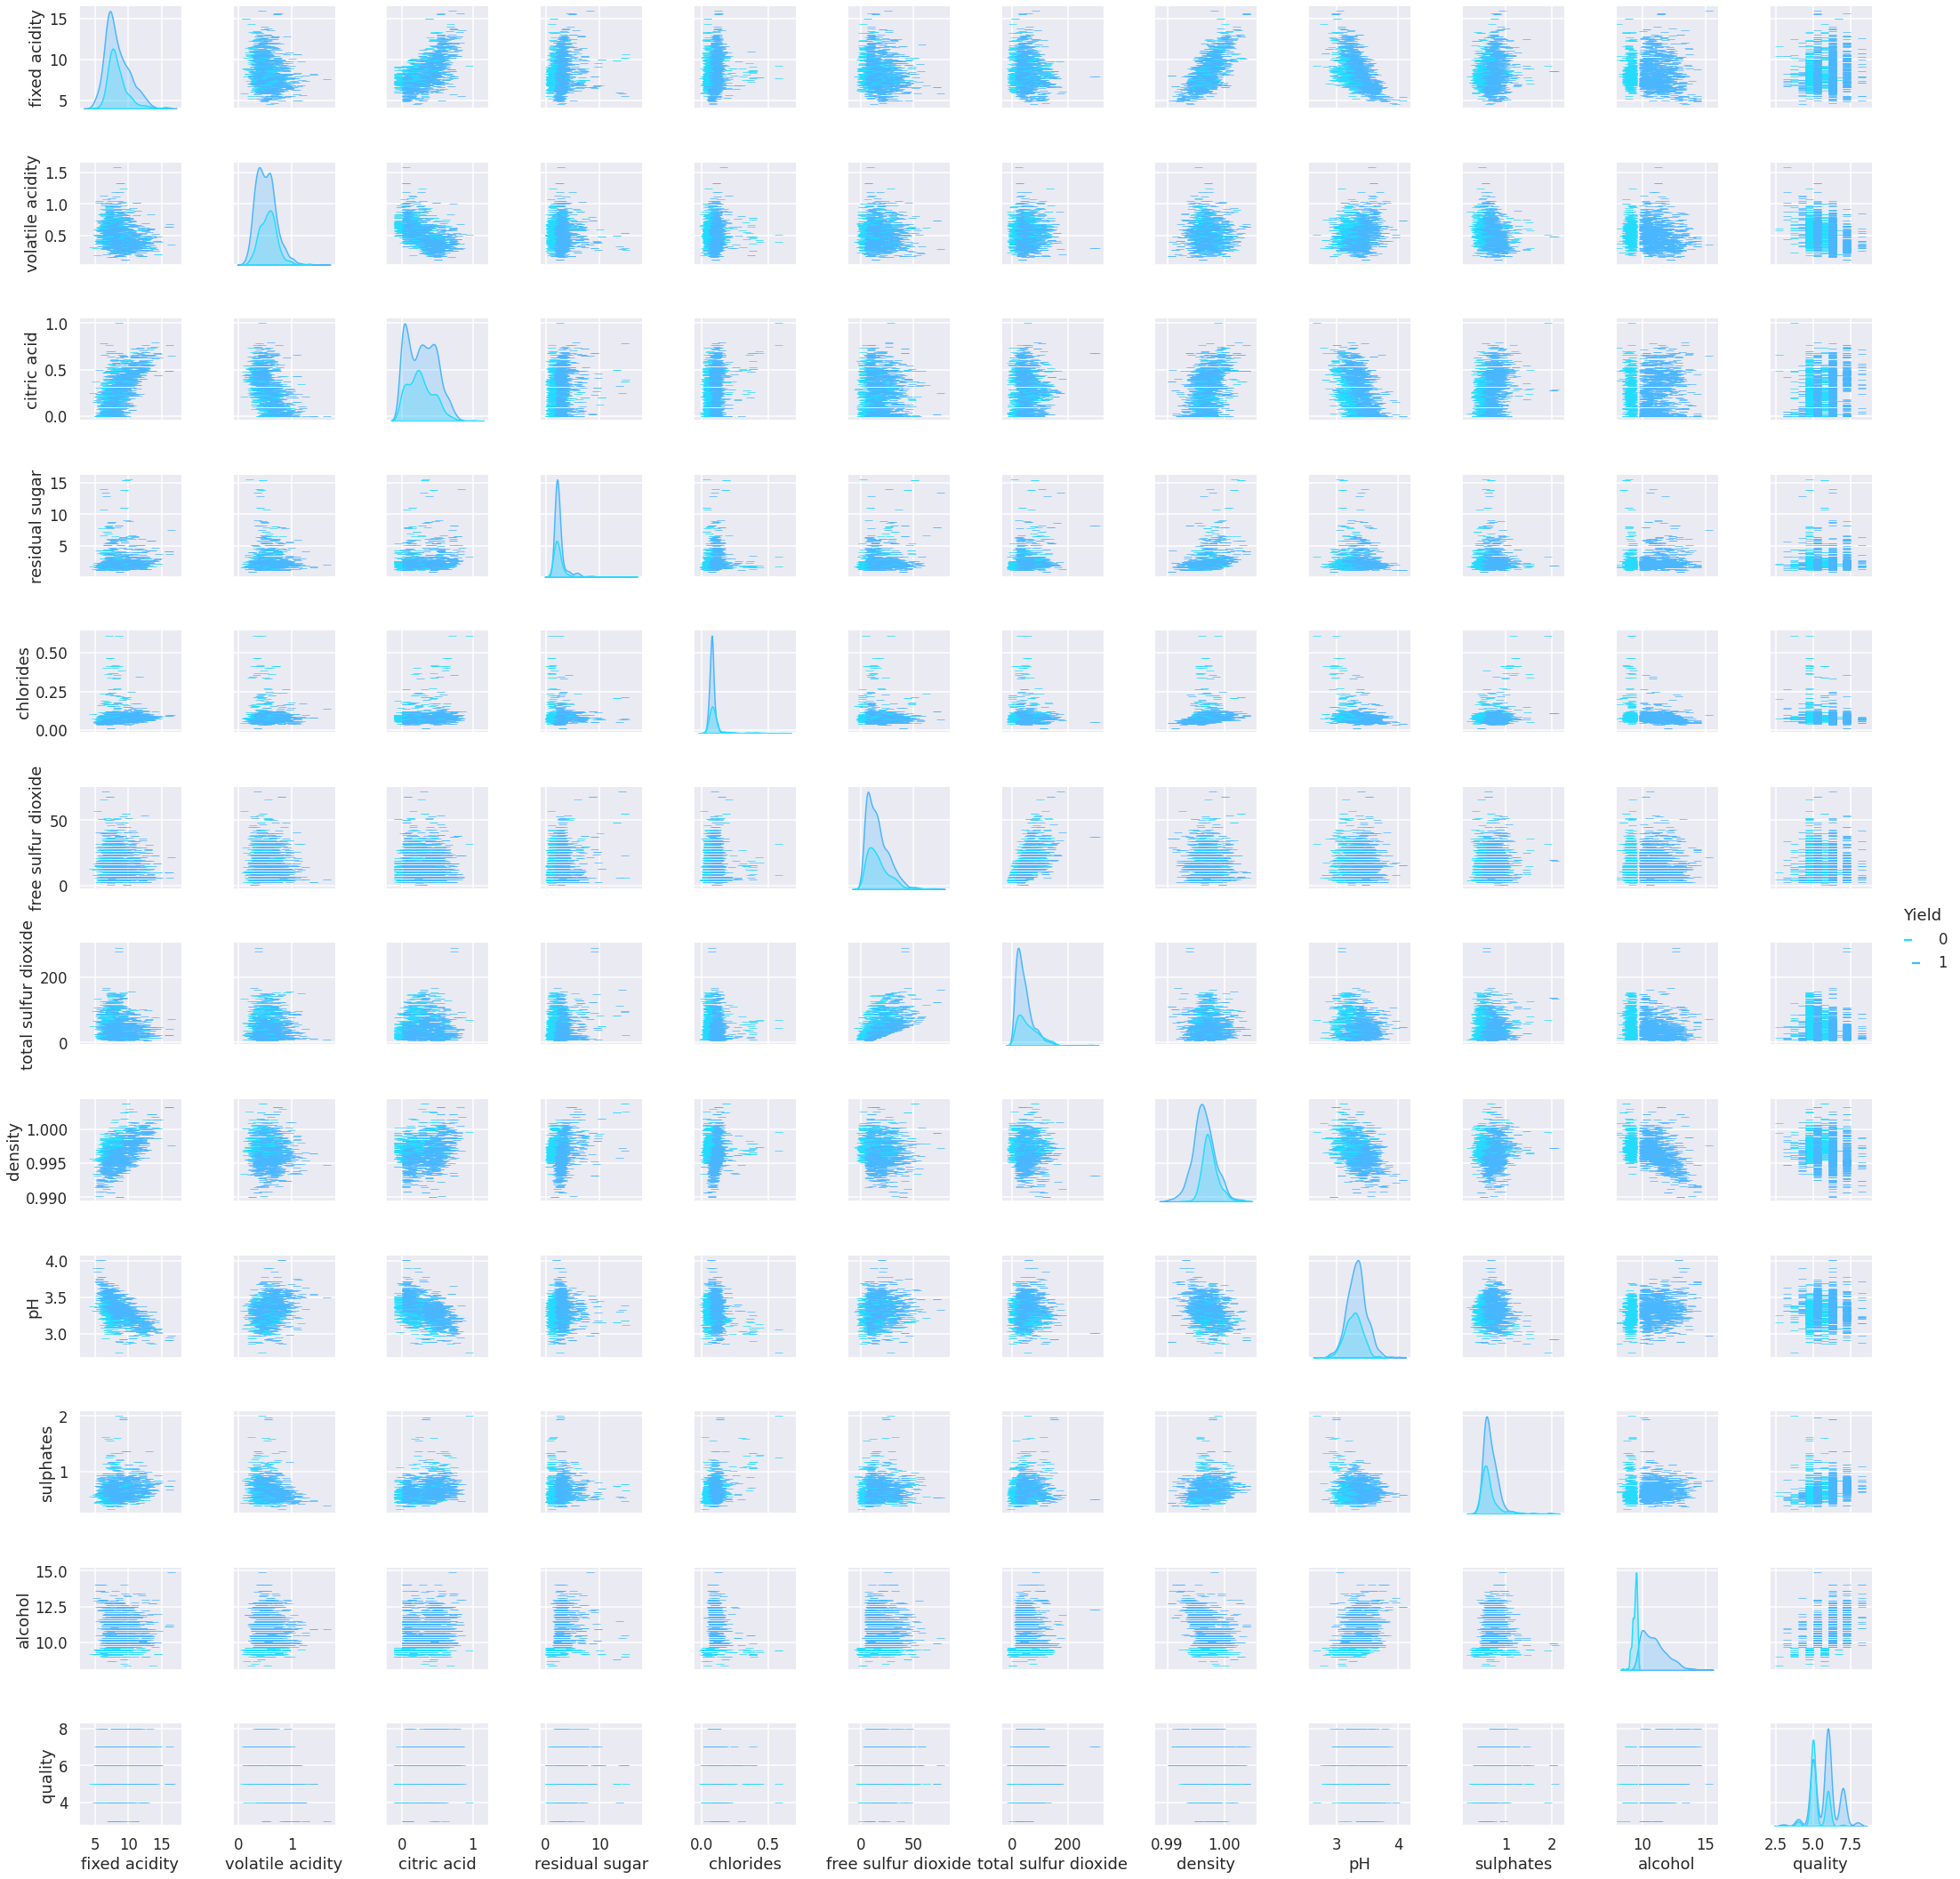

In [63]:
sns.pairplot(df, hue="Yield", markers = [0,1]);
#markers, işaret şekilleri için

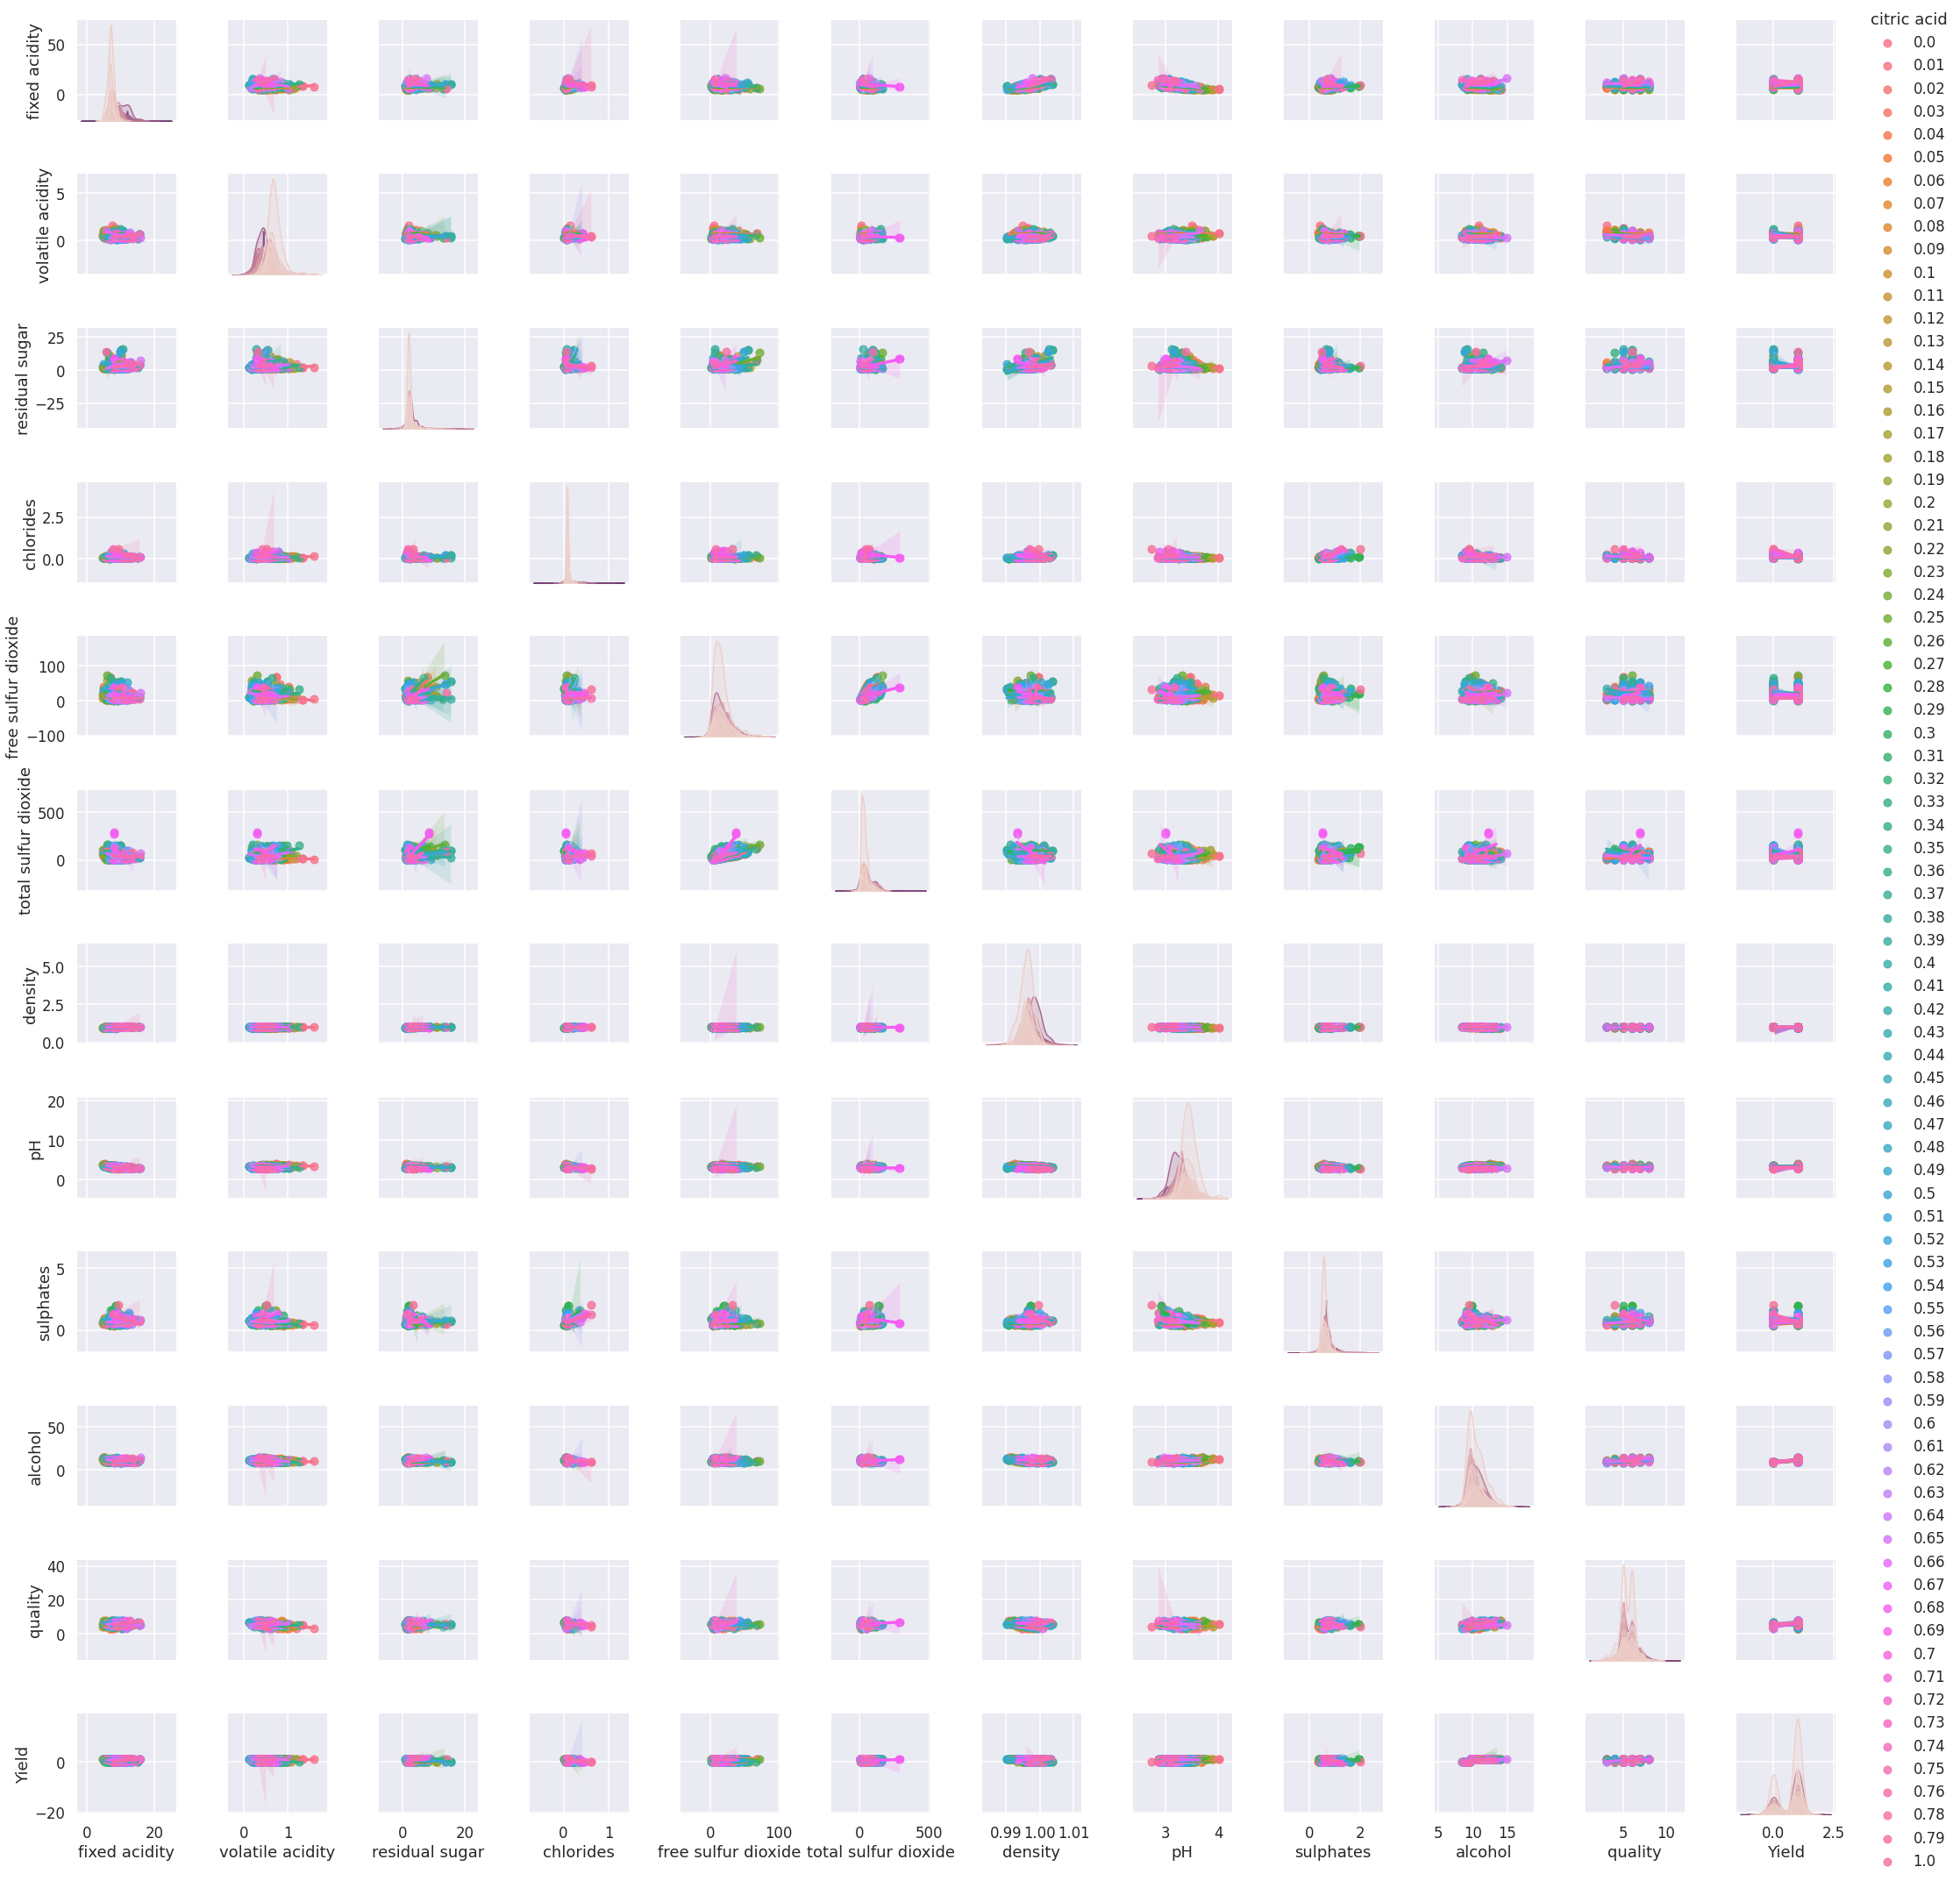

In [64]:
sns.pairplot(df, kind="reg",hue="citric acid");